# GFER Plamitate MitoSox
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [11]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports

In [12]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [13]:
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
sns.set_style("whitegrid")

In [14]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

Basic packages versions:
   Python version: 3.7.1 | packaged by conda-forge | (default, Mar 13 2019, 13:32:59) [MSC v.1900 64 bit (AMD64)]
   Packages:
   json: 2.0.9
   numpy: 1.16.2
   pandas: 0.24.2
   seaborn: 0.9.0


# General

# Loading the data

In [15]:
data_path = "../Data/Palmitate/12h/Standard lab acquisition protocol mitosox_pal12hmitosoxmito160419gfer1_1/agg_results.csv"

df = pd.read_csv(data_path, index_col=0)
df = df.drop(labels='index', axis=1)
df = df[df.nuc_outlier==False]
df = df[df.cyto_outlier==False]
df = df[df.Cyto_border_case==False]
df = df.drop(labels=['nuc_outlier', 'cyto_outlier', 'Cyto_border_case'], axis=1)
df.sample(5)

Cyto_intensity_avg  Cyto_intensity_count  Cyto_intensity_max  Cyto_intensity_q10  Cyto_intensity_q50  Cyto_intensity_q90  Cyto_intensity_std  Cyto_intensity_sum  Cyto_morphological_area  Cyto_morphological_aspect_ratio  Cyto_morphological_circularity_size_ratio  Cyto_morphological_cx  Cyto_morphological_cy  Cyto_morphological_extent  Cyto_morphological_h  Cyto_morphological_min_enclosing_circle_area  Cyto_morphological_perimeter  Cyto_morphological_rect_area  Cyto_morphological_solidity  Cyto_morphological_w  MitoTracker_count  MitoTracker_in_MitoSox_avg_mean  MitoTracker_in_MitoSox_avg_median  MitoTracker_in_MitoSox_avg_q10  MitoTracker_in_MitoSox_avg_q90  MitoTracker_in_MitoSox_avg_std  MitoTracker_in_MitoSox_avg_sum  MitoTracker_in_MitoSox_max_mean  MitoTracker_in_MitoSox_max_median  MitoTracker_in_MitoSox_max_q10  MitoTracker_in_MitoSox_max_q90  MitoTracker_in_MitoSox_max_std  MitoTracker_in_MitoSox_max_sum  MitoTracker_in_MitoSox_q10_mean  \
37415           18.941128               27738.0                73.0                 2.0                10.0                53.0           19.275250            525389.0                  23880.0                         0.734884                                   0.056834                 1119.0                 1096.0                   0.078108                 645.0                                 488056.872638                   2364.150484                      305730.0                     0.251029                 474.0                5.0                        11.728788                          10.062500                        9.000000                       15.555579                        3.411426                       58.643941                        19.400000                               12.0                             9.0                            35.6                       14.909728                            97.0                         9.000000   
30214           16.012840               44003.0                57.0                 3.0                14.0                33.0           12.014484            704613.0                  42494.0                         0.990431                                   0.308479                 1094.0                 1233.0                   0.245556                 418.0                                 142645.175731                   2855.179923                      173052.0                     0.418947                 414.0               19.0                         8.741648                           8.514286                        8.250000                        9.599332                        0.670328                      166.091304                        10.631579                               10.0                             9.0                            13.4                        2.216367                           202.0                         8.042105   
10793           44.105345               14799.0               108.0                 3.0                47.0                87.0           31.522185            652715.0                  14393.0                         0.534965                                   0.193548                 1514.0                 1351.0                   0.328923                 286.0                                  76461.755783                    935.411248                       43758.0                     0.706613                 153.0                3.0                         7.057858                           5.834951                        5.378755                        9.226122                        2.627498                       21.173573                        18.333333                                8.0                             7.2                            33.6                       18.770544                            55.0                         5.000000   
36241           12.172547               55921.0               169.0                 2.0                 6.0                33.0        

In [16]:
df["Patient"] = np.nan
df.loc[df.column.isin([2, 3]), "Patient"] = "AV"
df.loc[df.column.isin([4, 5]), "Patient"] = "AG015"
df.loc[df.column.isin([6, 7]), "Patient"] = "EV"
df.loc[df.column.isin([8, 9]), "Patient"] = "CM"
df.loc[df.column.isin([10, 11]), "Patient"] = "progeria127"
display('ok'if df["Patient"].isna().any()==False else ':-(')

'ok'

In [17]:
patient_plate = df.groupby(['column', 'row']).Patient.first().unstack(level=-1).T
patient_plate

column  2   3      4      5   6   7   8   9            10           11
row                                                                   
B       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
C       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
D       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
E       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
F       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
G       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127

In [18]:
df["Compound"] = np.nan
df.loc[df.column.isin([2,4,6,8,10]), "Compound"] = "Normal"
df.loc[df.column.isin([3,5,7,9,11]), "Compound"] = "Palmitate"

display('ok'if df["Patient"].isna().any()==False else ':-(')

'ok'

In [19]:
compound_plate = df.groupby(['column', 'row']).Compound.first().unstack(level=-1).T
compound_plate

column      2          3       4          5       6          7       8          9       10         11
row                                                                                                  
B       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
C       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
D       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
E       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
F       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
G       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate

# Number of cells 


In [20]:
cell_in_well = df.groupby(["row", "column"])["Compound"].count().unstack(level=-1)
ax = sns.heatmap(cell_in_well, linewidths=0.5, annot=True, fmt="0.00f")
ax.xaxis.set_ticks_position('top')

In [21]:
order = ['Normal', 'Palmitate']

In [22]:
g = df.groupby(["row", "column", "Patient", "Compound"])["Cyto_intensity_avg"].count()
g = g.groupby(["Patient", "Compound"]).mean().reset_index()


sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="Patient", y="Cyto_intensity_avg", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cells Count")
ax.legend(loc = 1)
plt.tight_layout()


# Analyzing the features

In [23]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="Cyto_morphological_area", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("Cyto_size")
plt.tight_layout()

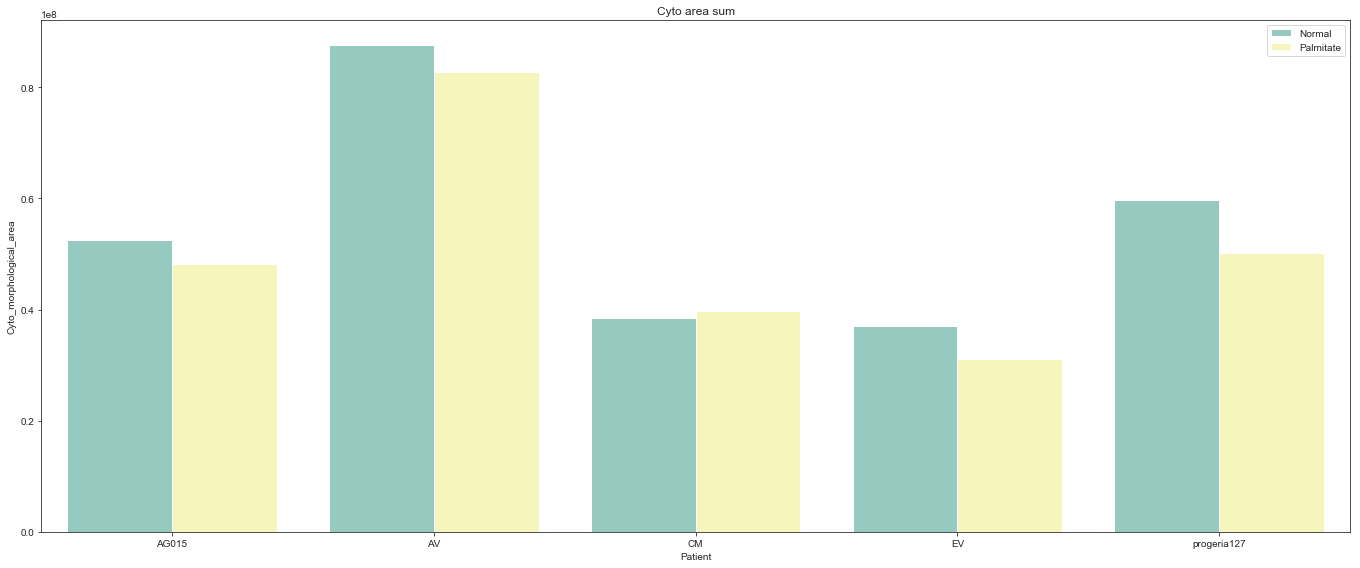

In [24]:
g = df.groupby(['Patient', 'Compound'])["Cyto_morphological_area"].sum().reset_index()

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="Patient", y="Cyto_morphological_area", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cyto area sum")
ax.legend(loc = 1)
plt.tight_layout()


In [25]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MitoTracker_intensity_avg_mean", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MitoTracker_intensity_avg_mean")
plt.tight_layout()

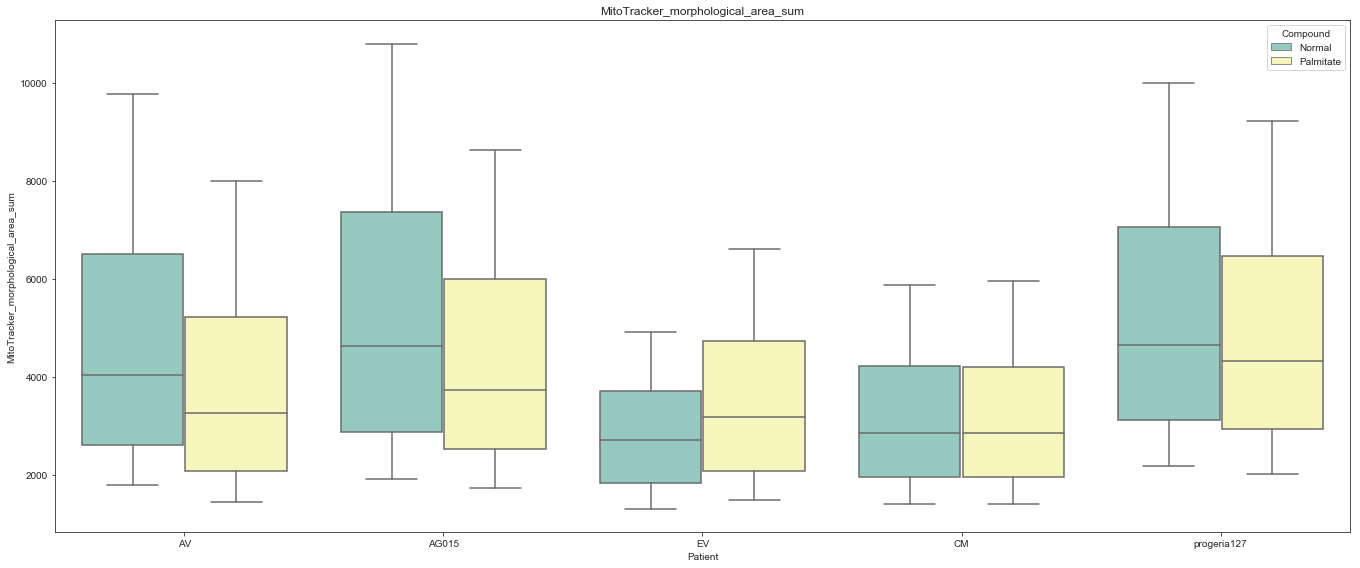

In [26]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MitoTracker_morphological_area_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MitoTracker_morphological_area_sum")
plt.tight_layout()

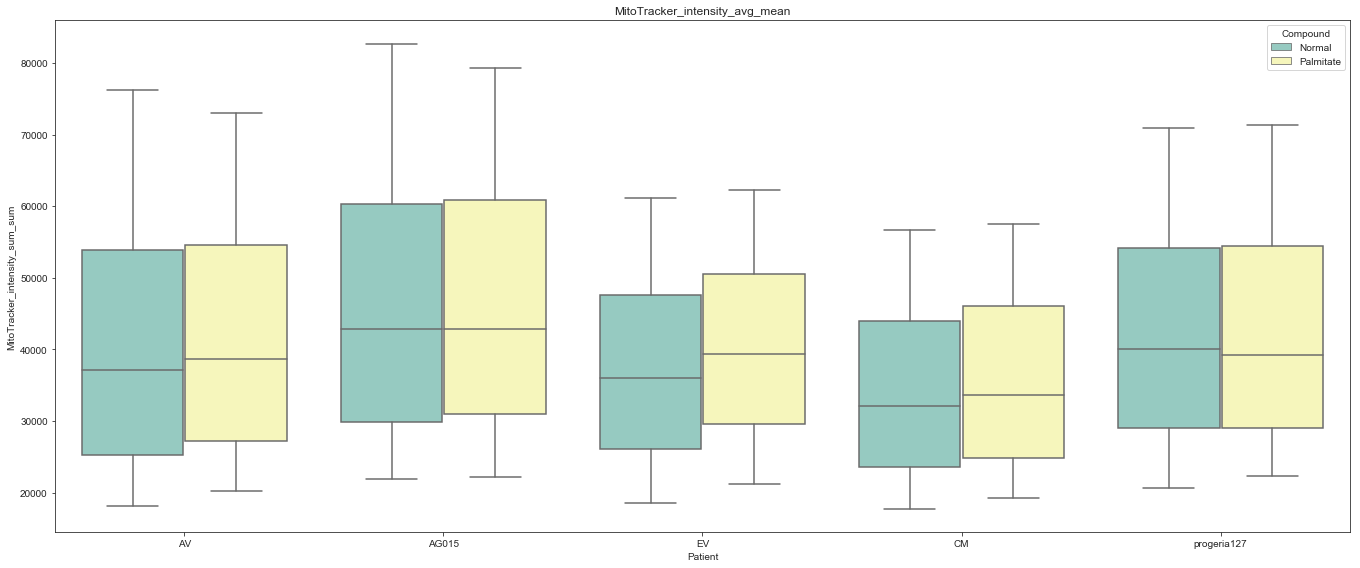

In [27]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MitoTracker_intensity_sum_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MitoTracker_intensity_avg_mean")
plt.tight_layout()

In [28]:
field = 'MitoTracker_count'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

In [31]:
field = 'MitoTracker_morphological_aspect_ratio_median'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

In [34]:
df.columns.tolist()

['Cyto_intensity_avg',
 'Cyto_intensity_count',
 'Cyto_intensity_max',
 'Cyto_intensity_q10',
 'Cyto_intensity_q50',
 'Cyto_intensity_q90',
 'Cyto_intensity_std',
 'Cyto_intensity_sum',
 'Cyto_morphological_area',
 'Cyto_morphological_aspect_ratio',
 'Cyto_morphological_circularity_size_ratio',
 'Cyto_morphological_cx',
 'Cyto_morphological_cy',
 'Cyto_morphological_extent',
 'Cyto_morphological_h',
 'Cyto_morphological_min_enclosing_circle_area',
 'Cyto_morphological_perimeter',
 'Cyto_morphological_rect_area',
 'Cyto_morphological_solidity',
 'Cyto_morphological_w',
 'MitoTracker_count',
 'MitoTracker_in_MitoSox_avg_mean',
 'MitoTracker_in_MitoSox_avg_median',
 'MitoTracker_in_MitoSox_avg_q10',
 'MitoTracker_in_MitoSox_avg_q90',
 'MitoTracker_in_MitoSox_avg_std',
 'MitoTracker_in_MitoSox_avg_sum',
 'MitoTracker_in_MitoSox_max_mean',
 'MitoTracker_in_MitoSox_max_median',
 'MitoTracker_in_MitoSox_max_q10',
 'MitoTracker_in_MitoSox_max_q90',
 'MitoTracker_in_MitoSox_max_std',
 'MitoTrac

ValueError: Could not interpret input 'MitSox_intensity_avg'

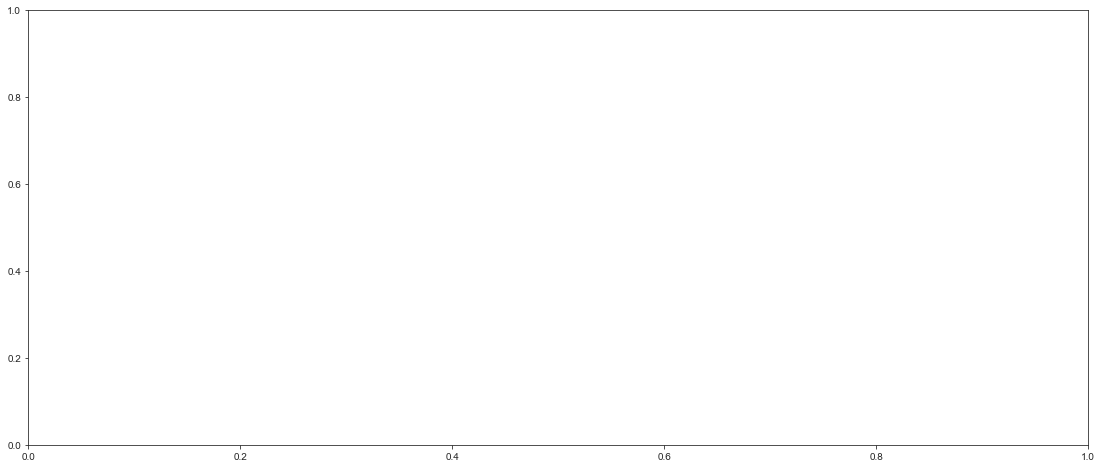

In [33]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MitSox_intensity_avg", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("TMRE_intensity_avg_mean")
plt.tight_layout()

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="TMRE_intensity_q50_mean", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("TMRE_intensity_q10_mean")
plt.tight_layout()

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="TMRE_intensity_sum_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("TMRE_intensity_sum_sum")
plt.tight_layout()

In [ ]:

field = 'TMRE_morphological_area_sum'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

In [ ]:
field = 'MitoTracker_morphological_circularity_size_ratio_mean'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

In [ ]:
df['MitoTracker_morphological_area_sum*'] = df['MitoTracker_morphological_area_sum']/df['Cyto_morphological_area']
field = 'MitoTracker_morphological_area_sum*'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

In [ ]:
df['TMRE_morphological_area_sum*'] = df['TMRE_morphological_area_sum']/df['Cyto_morphological_area']

field = 'TMRE_morphological_area_sum*'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

In [ ]:
df['TMRE_morphological_area_sum**'] = df['TMRE_morphological_area_sum']/df['MitoTracker_morphological_area_sum']

field = 'TMRE_morphological_area_sum**'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

In [ ]:
# df.columns.tolist()